<a href="https://colab.research.google.com/github/nbkwon/ml-assignment/blob/master/ml_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 과제 2에서 가져온 함수

import numpy

def get_by_linear(t_list, factor_list):
    sum = t_list[0]
    for t, factor in zip(t_list[1:], factor_list):
        sum = sum + t * factor

    return sum

# 
def calc_energy_value(theta_list, data_dic):
    ret = 0

    m = len(data_dic)

    for factor_list, result_in_data in data_dic.items():
        calc_y = get_by_linear(theta_list, factor_list)
        calc_result = calc_y - result_in_data

        ret = ret + (calc_result * calc_result)

    return ret / (m * 2)
    
# Gradient Descent를 위해 cost function을 변형한 식
def calc_cost_sum_for_gradient_descent(theta_list, data_dic, multiply_bitmap):
    ret = 0

    m = len(data_dic)

    for factor_list, result_in_data in data_dic.items():
        calc_y = get_by_linear(theta_list, factor_list)
        calc_result = calc_y - result_in_data

        for factor, multiply_flag in zip(factor_list, multiply_bitmap):
            if multiply_flag == 0:
                continue

            calc_result = calc_result * factor

        ret = ret + calc_result

    return ret / m
    
def next_gradient_descent_step(step_size, theta_list, data_dic):
    next_theta_list = []
    for i in range(len(theta_list)):
        bitmap = []
        for j in range(len(theta_list) - 1):
            if i - 1 == j:
                bitmap.append(1)
            else:
                bitmap.append(0)

        # print(bitmap)

        next_theta = theta_list[i] - step_size * calc_cost_sum_for_gradient_descent(theta_list, data_dic, bitmap)
        next_theta_list.append(next_theta)

    return next_theta_list
    
def check_convergence(theta_list, new_theta_list):
    # float 형의 자료형 동일한지 판단을 위해 numpy의 isclose를 사용.
    atol = 0.0001
    return numpy.isclose(theta_list, new_theta_list, atol=atol)

In [0]:
# we now need pyplot for plotting data
import matplotlib.pyplot as pyplot
def show_plot(download_file = False):
    pyplot.show()
    if download_file == False:
       return
    
    import google.colab
    file_name = "test.png"
    pyplot.savefig(file_name)
    google.colab.files.download(file_name)

def make_plot(plot_data_list):
    # it's too samll. make bigger.
    pyplot.figure(figsize=(50, 25))

    for data_dic, plot_type, color in plot_data_list:
        if plot_type is "plot":
            pyplot.plot(list(data_dic.keys()), list(data_dic.values()), c=color)
        if plot_type is "scatter":
            pyplot.scatter(list(data_dic.keys()), list(data_dic.values()), c=color)

In [0]:
import csv

x_train = []
y_train = []
z_train = []
h_train = []
with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        x_train.append(float(i[0]))
        y_train.append(float(i[1]))
        z_train.append(float(i[2]))
        h_train.append(float(i[3]))
        ct += 1

x_test = []
y_test = []
z_test = []
h_test = []
with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        x_test.append(float(i[0]))
        y_test.append(float(i[1]))
        z_test.append(float(i[2]))
        h_test.append(float(i[3]))
        ct += 1

In [44]:
factor_to_result_train = dict(zip(zip(x_train, y_train, z_train), h_train))
factor_to_result_test = dict(zip(zip(x_test, y_test, z_test), h_test))

current_theta_list = [3.3, 9.9, 7.8, 5.4]

step_size = 0.000001

step_count = 0

step_count_to_energy_value = {step_count: calc_energy_value(current_theta_list, factor_to_result_train)}
step_count_to_energy_value_test = {step_count: calc_energy_value(current_theta_list, factor_to_result_test)}
step_count_to_theta_list = {step_count: current_theta_list}

# print(current_theta_list, "loss", step_count_to_energy_value[0])
# print(current_theta_list, "loss", step_count_to_energy_value_test[0])

while(True):
    step_count = step_count + 1
    next_theta_list = next_gradient_descent_step(step_size, current_theta_list, factor_to_result_train)
    
    step_count_to_energy_value[step_count] = calc_energy_value(next_theta_list, factor_to_result_train)
    step_count_to_energy_value_test[step_count] = calc_energy_value(next_theta_list, factor_to_result_test)

    step_count_to_theta_list[step_count] = next_theta_list
    
    if check_convergence(current_theta_list, next_theta_list).all():
        break 

    # print(current_theta_list, "->", next_theta_list, "loss", step_count_to_energy_value[step_count], "test", step_count_to_energy_value_test[step_count])
    current_theta_list = next_theta_list

# show calculated theta
print("current_theta_pair", current_theta_list)

current_theta_pair [3.2542981183368815, 1.5245827613424634, -1.0049185055543057, 2.4678891163509307]


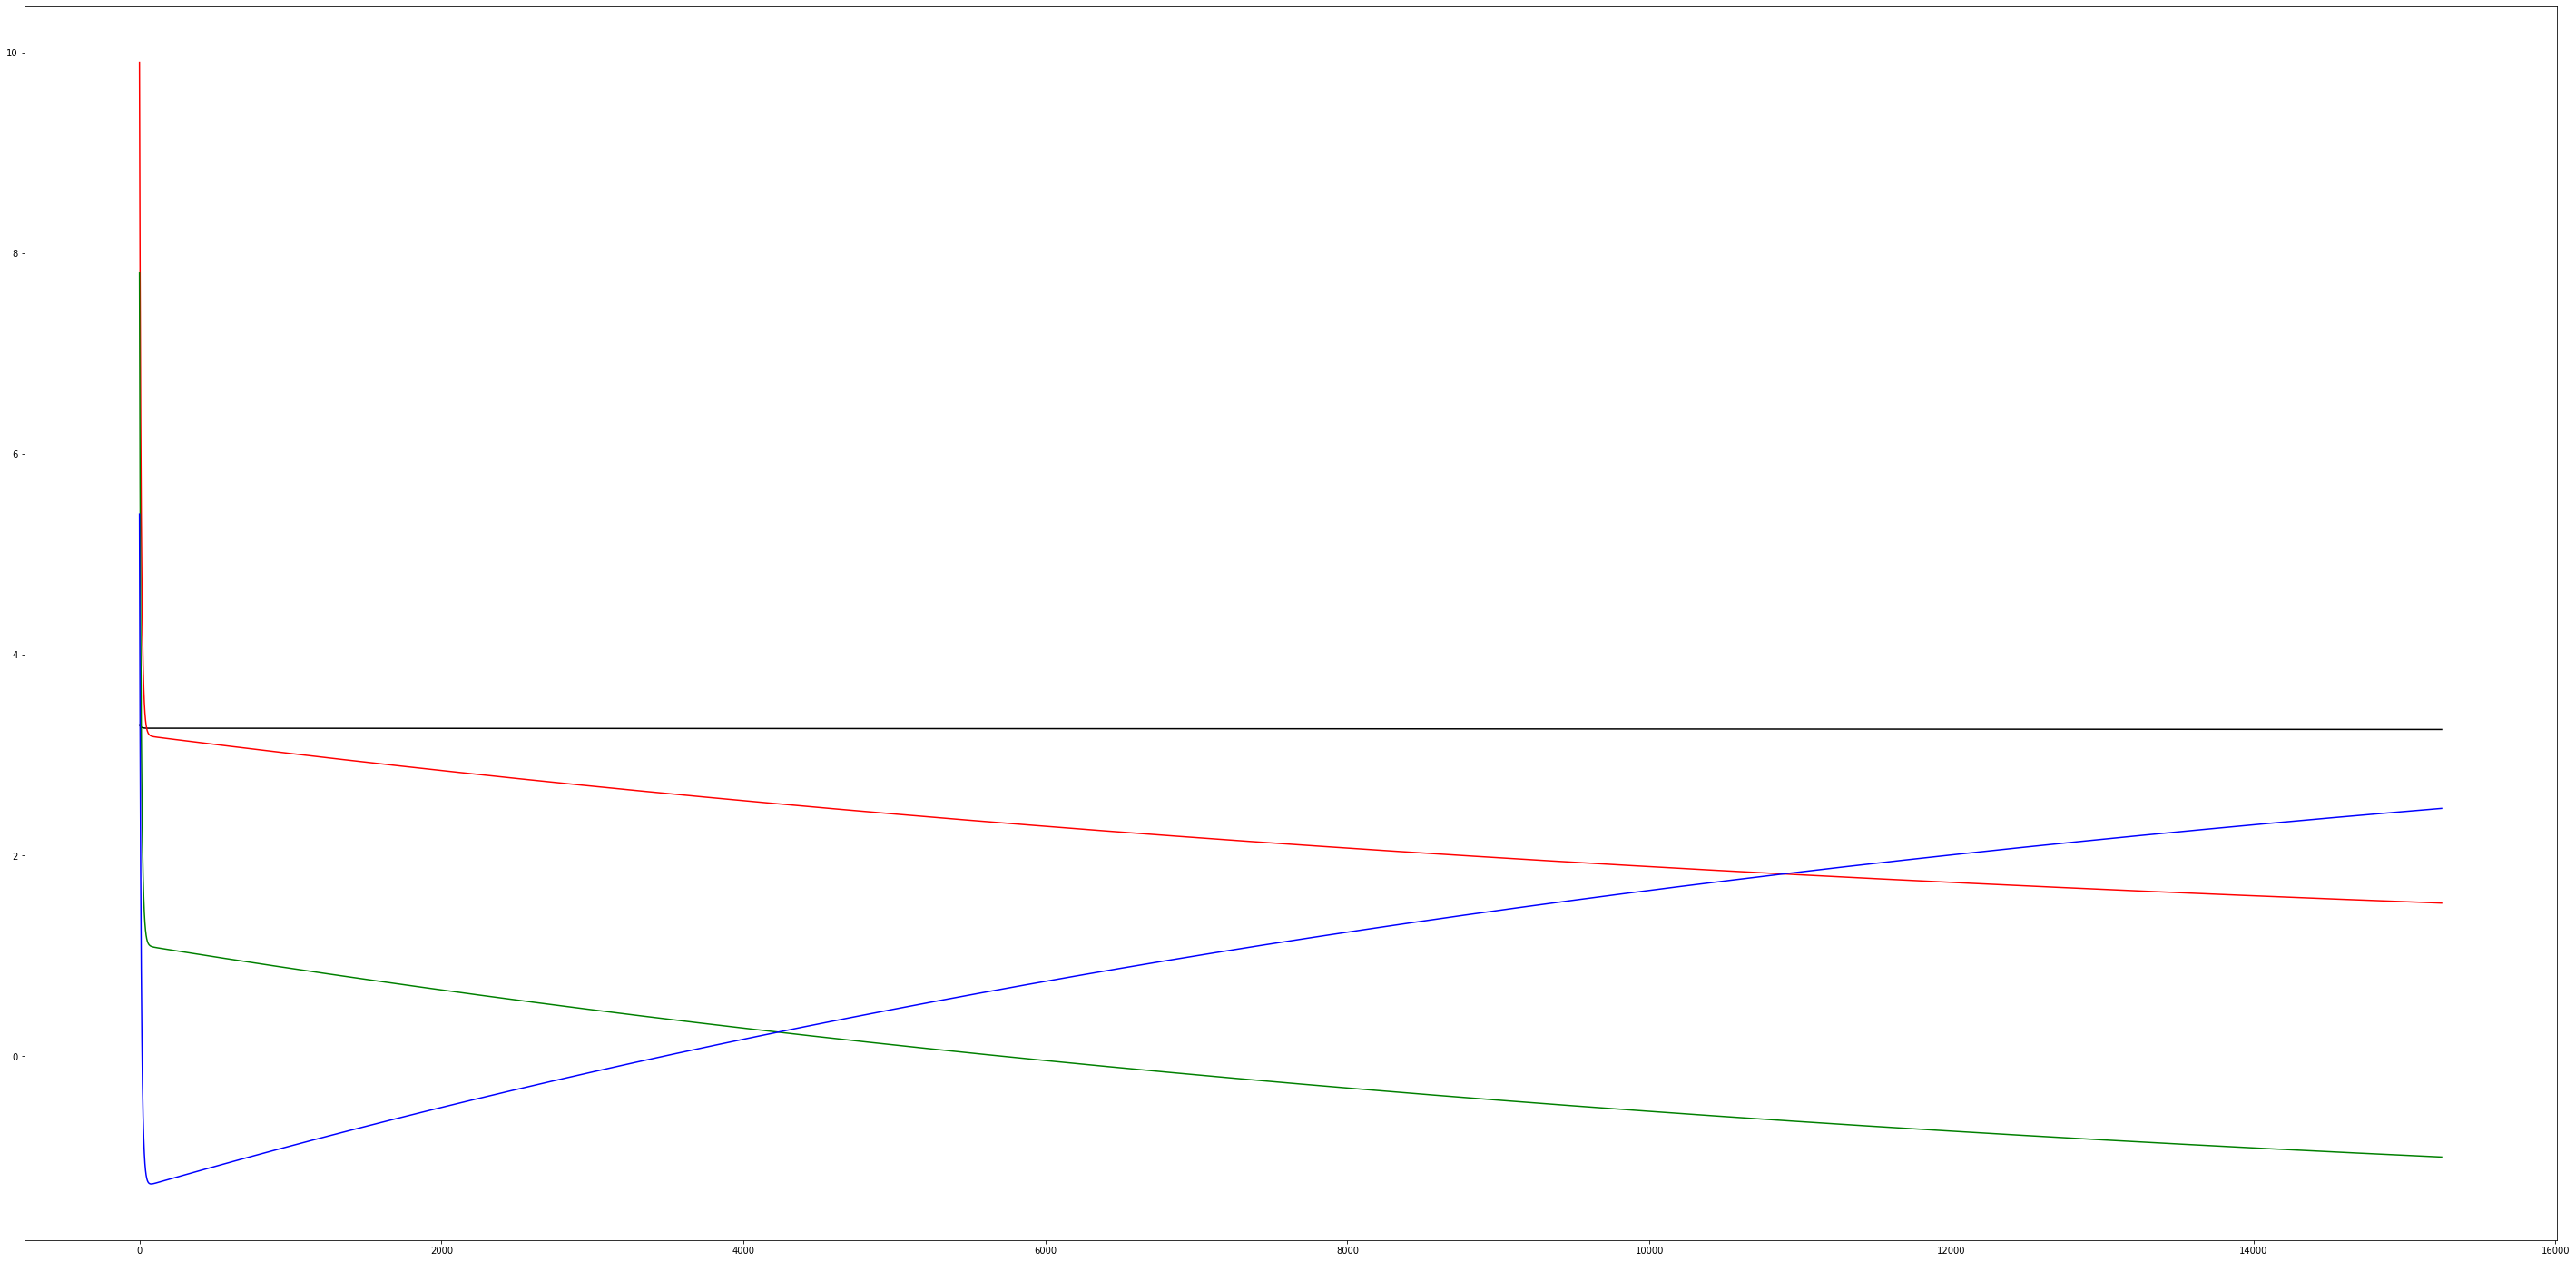

In [45]:
map_in_list = [{},{},{},{}]
for step_count, theta_list in step_count_to_theta_list.items():
    map_in_list[0][step_count] = theta_list[0]
    map_in_list[1][step_count] = theta_list[1]
    map_in_list[2][step_count] = theta_list[2]
    map_in_list[3][step_count] = theta_list[3]

make_plot([(map_in_list[0], "plot", "black"), (map_in_list[1], "plot", "red"),(map_in_list[2], "plot", "green"),(map_in_list[3], "plot", "blue")])
show_plot()


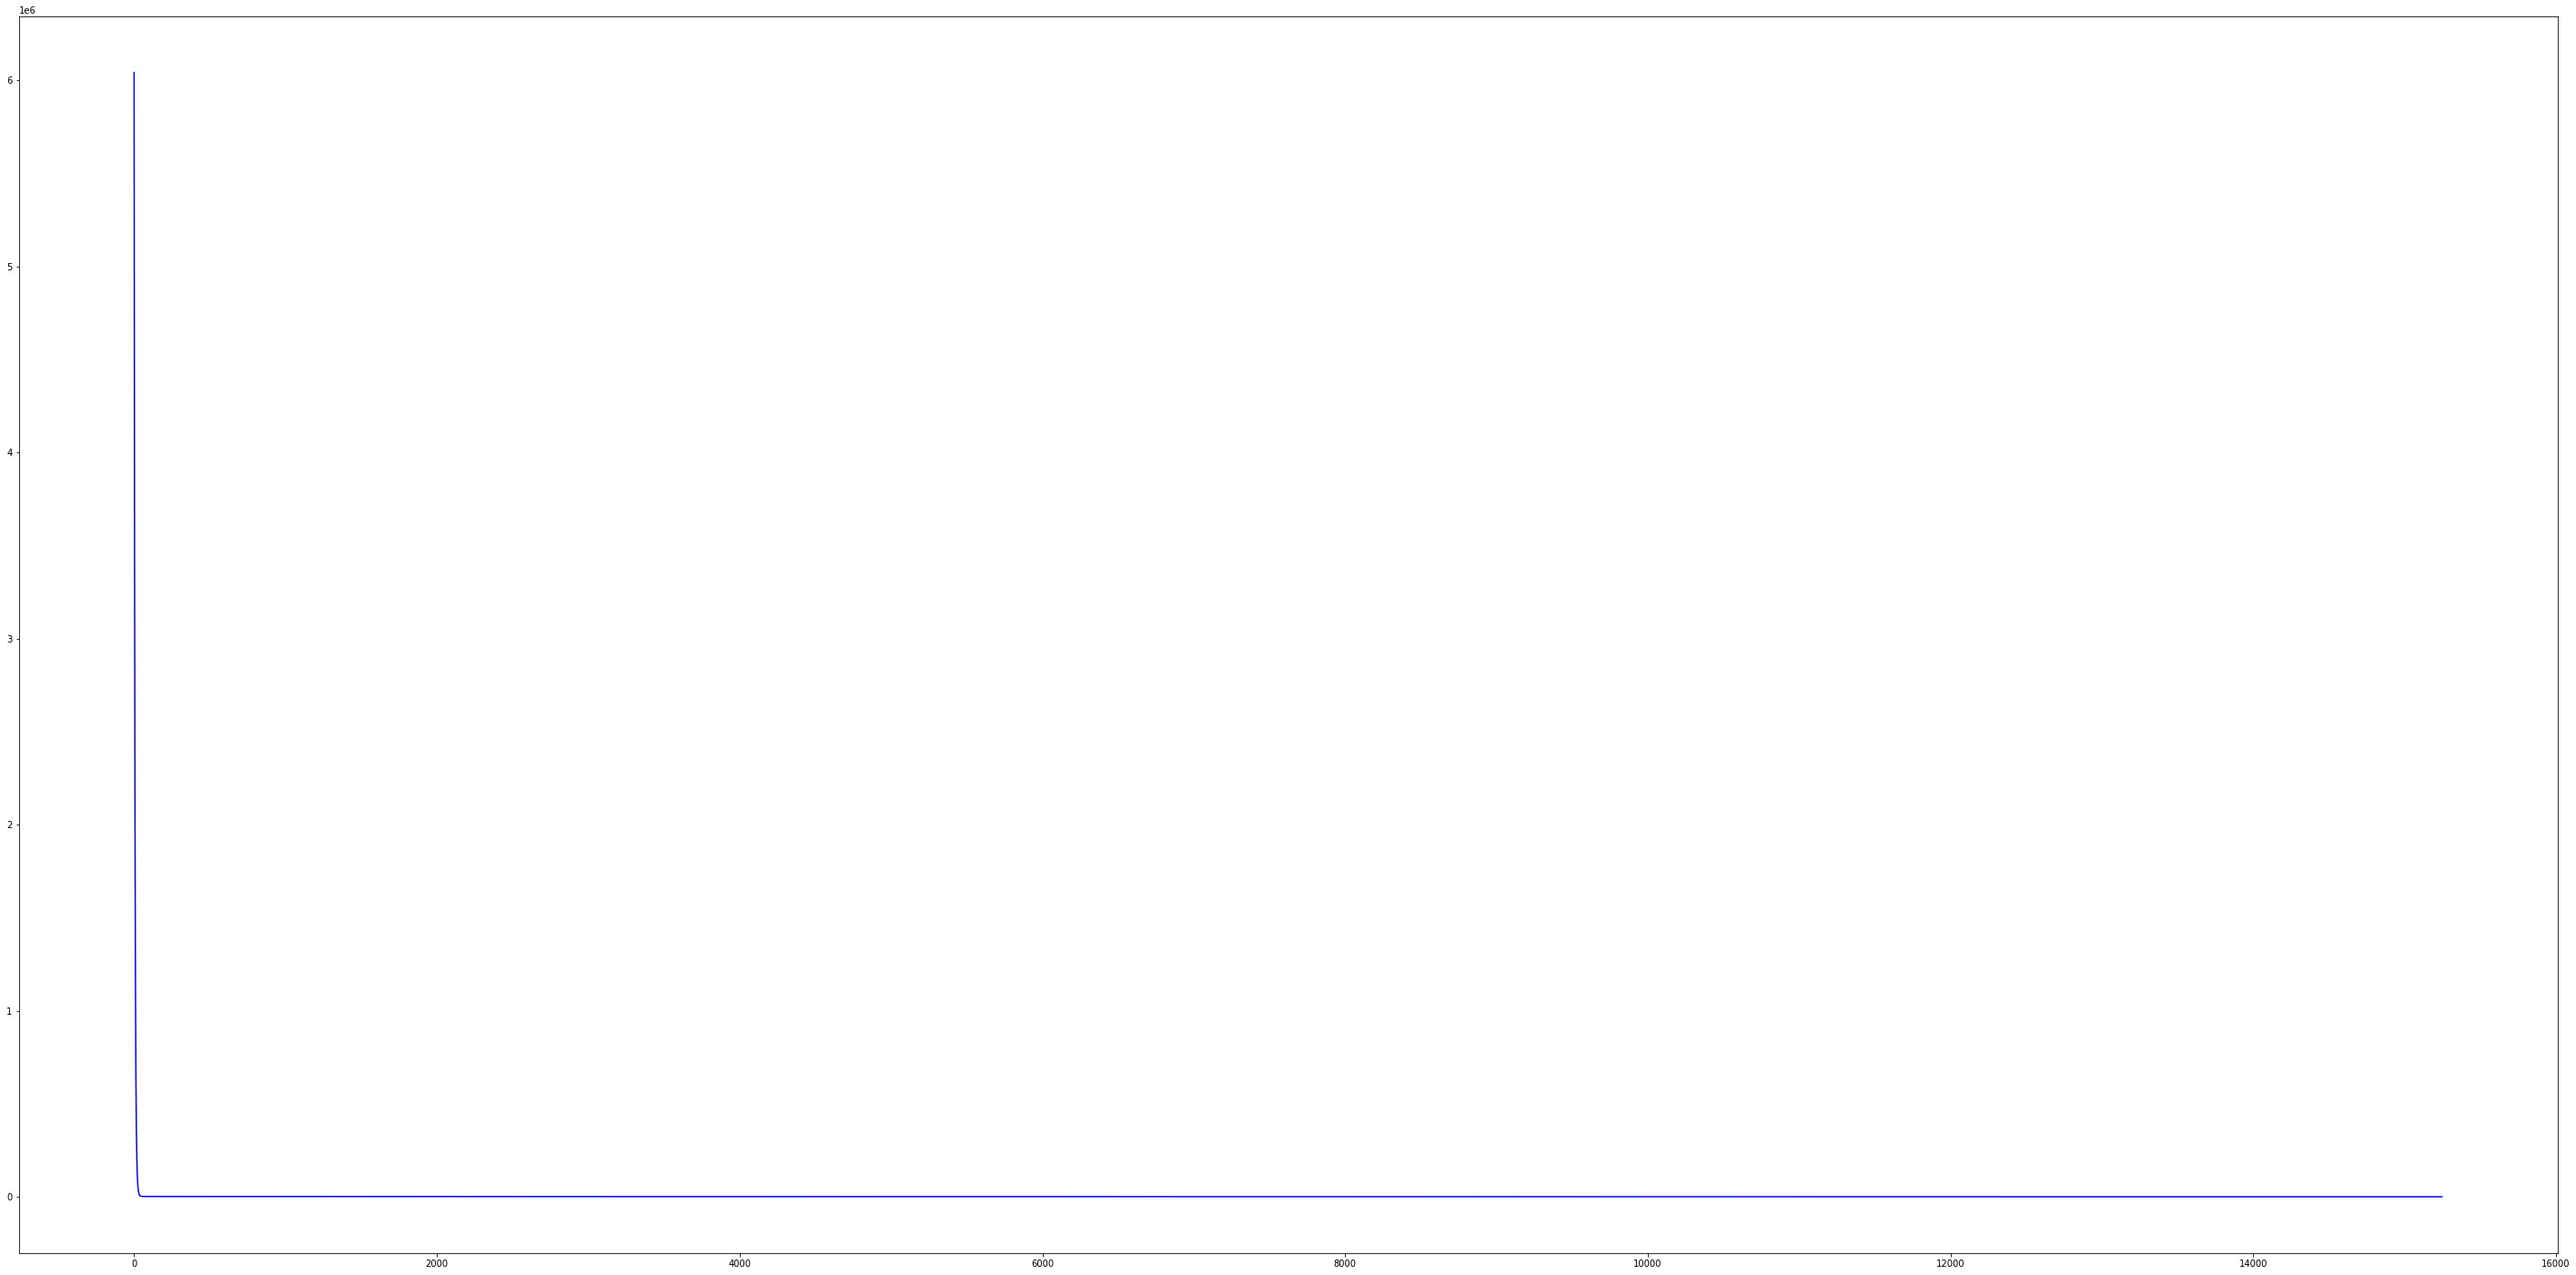

In [46]:

make_plot([(step_count_to_energy_value, "plot", "blue")])
show_plot()


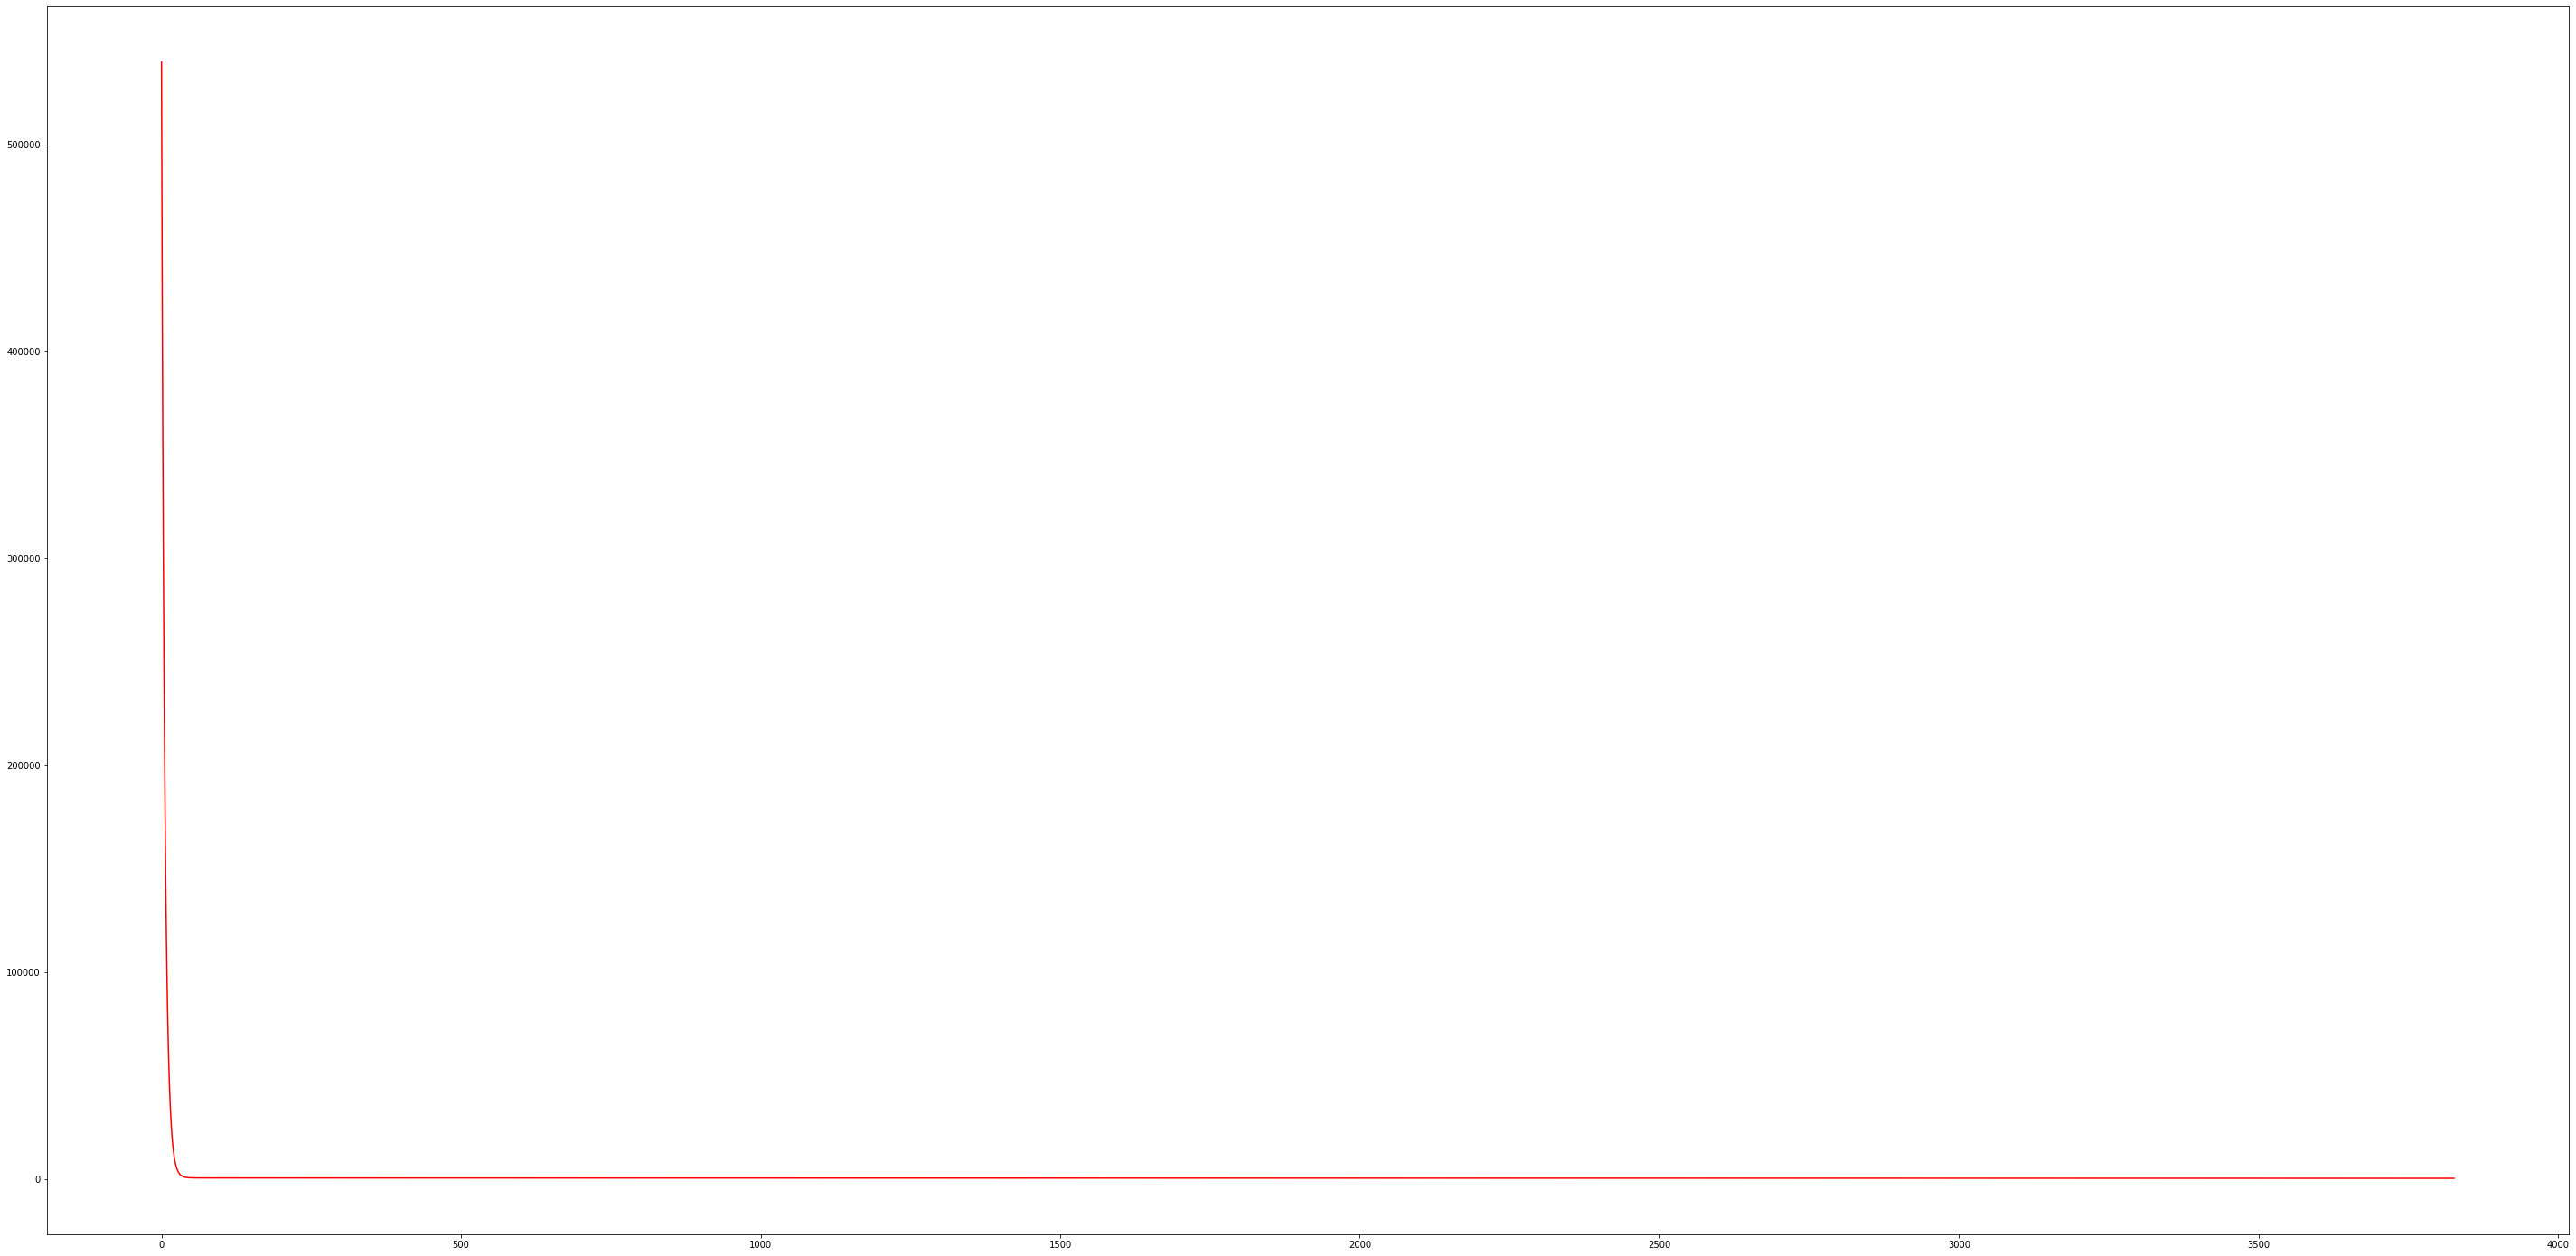

In [43]:

make_plot([(step_count_to_energy_value_test, "plot", "red")])
show_plot()
